## Análisis Prescriptivo: Optimización de precios de venta

El análisis de optimización de precios y ganancias se utiliza para determinar los precios óptimos que maximizan la ganancia de un negocio. En este tipo de análisis se consideran diferentes factores como el costo de producción, la demanda del mercado, la competencia, entre otros.

En el caso del código presentado, se utilizó el modelo de Markup, que se basa en agregar un margen al costo de producción para obtener el precio de venta final. La tasa de descuento se utiliza para calcular el precio óptimo que maximiza la ganancia.

Una vez que se ha determinado el precio óptimo, se pueden hacer ajustes en los precios de los productos para mejorar la rentabilidad del negocio. Sin embargo, es importante tener en cuenta que el análisis de optimización de precios y ganancias es un proceso iterativo y continuo que debe ser actualizado regularmente en función de cambios en las condiciones del mercado y en los costos de producción.

### Carga de las librerías necesarias de python

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

plt.rcParams['figure.figsize'] = [12, 8]
import warnings
warnings.filterwarnings('ignore')

### Extracción de los datos desde SQL Server

In [2]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LENOVO\SQLEXPRESS;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
input_query = '''select
	t1.ProductID,
	t2.Name as 'producto',
	sum(t1.OrderQty) as 'demanda',
	avg(t1.UnitPrice) as 'precio_promedio',
	avg(t2.StandardCost) as 'costo'
from Sales.SalesOrderDetail as t1
	inner join Production.Product as t2 on t1.ProductID =t2.ProductID
	group by t1.ProductID, t2.Name'''

df = pd.read_sql(input_query, conn_str)


### Exploración inicial de los datos

Se presenta la dimensión del dataset extraído y las variables que lo componen

In [3]:
df.shape

(266, 5)

In [4]:
df.columns

Index(['ProductID', 'producto', 'demanda', 'precio_promedio', 'costo'], dtype='object')

In [5]:
df.head(10)

,ProductID,producto,demanda,precio_promedio,costo
0,925,"LL Mountain Frame - Black, 44",625,149.85,136.78
1,902,"LL Touring Frame - Yellow, 58",36,200.05,199.85
2,710,"Mountain Bike Socks, L",90,5.70,3.40
3,879,All-Purpose Bike Stand,249,159.00,59.47
4,733,"ML Road Frame - Red, 52",90,356.90,352.14
5,856,"Men's Bib-Shorts, M",1616,53.91,37.12
6,756,"Road-450 Red, 44",346,874.79,884.71
7,779,"Mountain-200 Silver, 38",2394,1819.62,1265.62
8,802,LL Fork,190,88.93,65.81
9,971,"Touring-2000 Blue, 50",322,989.06,755.15


### Procesamiento de los datos

#### Calcular el margen de descuento para cada producto

In [6]:
df['margen'] = df['precio_promedio'] - df['costo']

#### Definir una tasa de descuento para optimizar el precio

In [7]:
discount_rate = 0.1

#### Optimizar el precio para maximizar la ganancia utilizando el modelo de Markup

In [8]:
df['precio_optimizado'] = df['costo'] / (1 - discount_rate)

#### Calcular la ganancia para cada producto

In [9]:
df['ganancia'] = df['precio_optimizado'] - df['costo']

### Visualización gráfica de resultados

#### Visualizar la relación entre la demanda y el precio optimizado

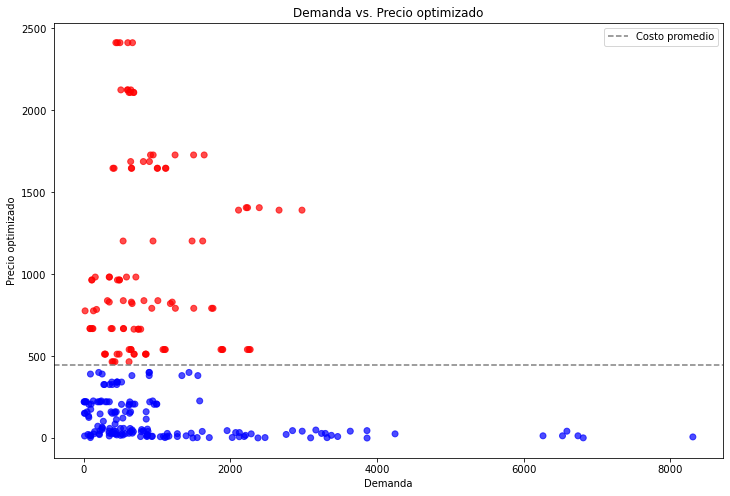

In [10]:
# Crear el gráfico de dispersión
fig, ax = plt.subplots()
colors = ['r' if p > df['costo'].mean() else 'b' for p in df['precio_optimizado']]
ax.scatter(df['demanda'], df['precio_optimizado'], c=colors, alpha=0.7)

# Agregar una línea que muestre el costo promedio
mean_cost = df['costo'].mean()
ax.axhline(y=mean_cost, linestyle='--', color='gray', label='Costo promedio')

# Añadir títulos y etiquetas
plt.xlabel('Demanda')
plt.ylabel('Precio optimizado')
plt.title('Demanda vs. Precio optimizado')
plt.legend()

# Mostrar el gráfico
plt.show()

#### Dataframe resultante para análisis posteriores

In [11]:
df

,ProductID,producto,demanda,precio_promedio,costo,margen,precio_optimizado,ganancia
0,925,"LL Mountain Frame - Black, 44",625,149.85,136.78,13.07,151.98,15.20
1,902,"LL Touring Frame - Yellow, 58",36,200.05,199.85,0.20,222.06,22.21
2,710,"Mountain Bike Socks, L",90,5.70,3.40,2.30,3.77,0.38
3,879,All-Purpose Bike Stand,249,159.00,59.47,99.53,66.07,6.61
4,733,"ML Road Frame - Red, 52",90,356.90,352.14,4.76,391.27,39.13
...,...,...,...,...,...,...,...,...
261,741,"HL Mountain Frame - Silver, 48",173,818.70,706.81,111.89,785.35,78.53
262,790,"Road-250 Red, 48",812,1886.63,1518.79,367.84,1687.54,168.75
263,990,"Mountain-500 Black, 42",388,378.27,294.58,83.69,327.31,32.73
264,933,HL Road Tire,858,32.60,12.19,20.41,13.55,1.35


## Conclusiones

A partir del análisis realizado, podemos ofrecer las siguientes conclusiones a la empresa **AdventureWorks**:

* Existe una relación inversa entre la demanda de los productos y el precio optimizado. Es decir, a medida que aumenta el precio optimizado, la demanda disminuye. Esto indica que la empresa puede aumentar sus ganancias si disminuye ligeramente los precios.

* El margen de descuento para los productos es un factor clave en la determinación del precio óptimo para maximizar las ganancias. La tasa de descuento del 10% utilizada en este análisis es un punto de partida que la empresa puede ajustar para cada producto en función de su margen.

* Algunos productos tienen una demanda muy baja y, por lo tanto, no generan muchas ganancias. La empresa puede considerar la posibilidad de reducir la producción o el inventario de estos productos para reducir los costos.

* Hay algunos productos que tienen un costo muy alto en comparación con su precio promedio y que, por lo tanto, no generan muchas ganancias. La empresa puede considerar la posibilidad de reducir los costos de producción de estos productos o de aumentar su precio para aumentar las ganancias.

En general, el análisis indica que hay oportunidades para la empresa de optimizar sus precios y aumentar sus ganancias al ajustar el margen de descuento y considerar la demanda de cada producto.

## Recomendaciones

A partir del análisis realizado, podemos ofrecer las siguientes recomendaciones a la empresa **AdventureWorks**:

* La empresa debe seguir monitoreando regularmente la relación entre la demanda y el precio de sus productos. Pueden utilizar herramientas de análisis de datos para rastrear y analizar la demanda y el precio de los productos, lo que les permitirá ajustar los precios de manera oportuna.

* La empresa puede considerar la posibilidad de reducir el costo de producción de los productos que tienen un costo elevado en comparación con su precio promedio, con el fin de aumentar la ganancia. Para reducir los costos, la empresa puede evaluar la posibilidad de optimizar sus procesos de producción o encontrar nuevos proveedores que ofrezcan materiales a un precio más bajo.

* La empresa puede considerar la posibilidad de aumentar el precio de los productos que tienen una demanda estable pero un precio bajo, lo que les permitirá aumentar su ganancia. Sin embargo, la empresa debe tener cuidado de no aumentar el precio demasiado, ya que esto puede disminuir la demanda y reducir las ganancias.

* La empresa puede considerar la posibilidad de descontinuar los productos que tienen una demanda muy baja y que no generan muchas ganancias. Al reducir la producción o el inventario de estos productos, la empresa puede reducir los costos y aumentar su eficiencia operativa.

* La empresa debe considerar la posibilidad de utilizar herramientas de análisis de precios y competencia para comparar sus precios con los precios de la competencia. Esto les permitirá ajustar sus precios de manera efectiva y mantenerse competitivos en el mercado.

En general, las recomendaciones se enfocan en ajustar el margen de descuento y considerar la demanda de cada producto con el fin de optimizar los precios y aumentar las ganancias. La empresa puede utilizar herramientas de análisis de datos y de precios para hacer esto de manera efectiva.